In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import json
import plotly.graph_objects as go

In [2]:
cd ..

/home/jorge/DocumentsWLS/Data_Science_Projects/Geospatial-similarity-combining-TDA-LLM-agents-and-MLOps-workflows


In [3]:
df_similarity = pd.read_parquet("results/similarity_matrix.parquet")
df_confidence = pd.read_parquet("results/confianza_matrix.parquet")
df_division = gpd.read_file("data/Division_politica/mun22gw.shp", encoding="latin-1")

In [4]:
df_similarity

CVEGEO,01002,02001,02002,03001,03003,03008,05009,05033,06009,08002,...,30183,30211,31003,31025,31047,31056,31089,31098,32020,32051
CVEGEO,,,,,,,,,,,,,,,,,,,,,
01001,0.813681,0.680093,0.616916,0.620336,0.642820,0.666585,0.740962,0.608811,0.713768,0.682098,...,0.657127,0.615733,0.723417,0.731618,0.727586,0.705102,0.723041,0.714457,0.773583,0.808450
01002,1.000000,0.683888,0.635743,0.611387,0.657127,0.683374,0.720950,0.625662,0.677153,0.680059,...,0.646016,0.640657,0.721417,0.731747,0.729280,0.743769,0.721010,0.745428,0.806713,0.753209
01004,0.835770,0.695474,0.650833,0.608477,0.631179,0.684320,0.732642,0.650670,0.663971,0.694305,...,0.688249,0.684338,0.736247,0.722030,0.715097,0.712508,0.765374,0.716853,0.821353,0.765493
01005,0.709234,0.603475,0.581201,0.540817,0.569436,0.654198,0.653777,0.539726,0.646450,0.591821,...,0.707984,0.629467,0.730629,0.735883,0.727554,0.703682,0.730570,0.685611,0.730137,0.718314
01006,0.854179,0.685415,0.655980,0.621698,0.669017,0.722573,0.734126,0.649486,0.664466,0.675000,...,0.687444,0.673880,0.749525,0.749218,0.740273,0.732490,0.747588,0.768028,0.833329,0.770513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32053,0.822498,0.657610,0.652382,0.584284,0.624751,0.682049,0.741973,0.627256,0.651736,0.658482,...,0.672421,0.644939,0.745114,0.737421,0.729132,0.722495,0.746596,0.753441,0.783503,0.771208
32055,0.803471,0.659527,0.635125,0.601879,0.623483,0.666151,0.727243,0.612490,0.669514,0.643685,...,0.677259,0.650653,0.730774,0.737005,0.728523,0.730121,0.763260,0.746612,0.804401,0.771682
32056,0.773708,0.676546,0.615217,0.586146,0.606594,0.651579,0.703697,0.593060,0.676001,0.642279,...,0.682025,0.629242,0.753698,0.747657,0.748570,0.737201,0.744385,0.754662,0.793217,0.768865


In [5]:
df_confidence

CVEGEO,01002,02001,02002,03001,03003,03008,05009,05033,06009,08002,...,30183,30211,31003,31025,31047,31056,31089,31098,32020,32051
CVEGEO,,,,,,,,,,,,,,,,,,,,,
01001,95.653824,96.342644,86.691605,92.966415,90.948639,91.658455,89.096245,82.309631,93.251816,98.456871,...,78.212715,86.573288,96.408310,95.588211,95.991379,95.510155,97.304054,88.112328,97.641716,97.511635
01002,100.000000,99.910545,88.574303,86.138718,89.462654,90.004112,85.731369,79.873901,78.826431,97.378700,...,85.398384,94.267677,92.975044,94.008072,93.761314,91.043610,90.851036,91.209465,96.412033,99.679146
01004,92.505585,91.816231,96.280304,97.485680,98.117897,93.431969,87.549881,84.511414,86.397125,91.680626,...,81.175148,94.066200,90.291321,88.869637,88.176331,79.584145,84.870689,80.018608,97.864655,98.450745
01005,78.423401,84.031715,80.488503,82.206734,76.388092,81.491219,81.286812,71.280266,82.502090,94.182053,...,79.201599,87.053314,98.062943,98.588272,97.755447,89.118233,94.485588,85.227737,90.513718,99.001984
01006,89.584549,97.953217,92.160507,97.884079,93.290558,98.576042,93.867134,88.025551,84.303772,98.571449,...,81.255569,90.945351,87.547546,87.578209,88.472679,98.248985,96.074577,98.197235,96.667053,95.865364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32053,97.295631,98.524734,97.261818,91.571632,96.850067,88.204941,99.197266,93.975609,83.923637,94.151825,...,67.242058,81.160606,74.511383,73.742073,72.913239,84.749496,87.159607,87.844070,96.649734,99.343056
32055,98.680481,86.407272,88.512543,87.110931,78.419762,89.115135,86.360619,73.748955,75.284775,87.285187,...,82.274124,96.315346,85.577415,86.200508,85.352310,80.154991,84.659317,91.327919,96.349152,97.622757
32056,94.057800,94.737907,97.853294,97.250977,91.214989,90.157951,87.036339,75.972656,92.600075,99.408463,...,81.797478,95.409164,87.130211,87.734253,87.642998,95.029892,94.311531,87.966240,95.678314,95.636520


In [6]:
df_division.drop(columns=["COV_", "COV_ID","AREA", "PERIMETER"], inplace=True)

In [7]:
df_division

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,geometry
0,01008,01,008,San José de Gracia,Aguascalientes,"POLYGON ((-102.35385 22.12064, -102.35426 22.1..."
1,01009,01,009,Tepezalá,Aguascalientes,"POLYGON ((-102.16213 22.34851, -102.16149 22.3..."
2,01010,01,010,El Llano,Aguascalientes,"POLYGON ((-101.89778 21.95839, -101.89037 21.9..."
3,01011,01,011,San Francisco de los Romo,Aguascalientes,"POLYGON ((-102.14088 22.07534, -102.14086 22.0..."
4,01001,01,001,Aguascalientes,Aguascalientes,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
...,...,...,...,...,...,...
2470,32014,32,014,General Francisco R. Murguía,Zacatecas,"POLYGON ((-102.89148 24.46084, -102.88558 24.4..."
2471,32043,32,043,Susticacán,Zacatecas,"POLYGON ((-103.10931 22.57209, -103.11083 22.5..."
2472,32045,32,045,Tepechitlán,Zacatecas,"POLYGON ((-103.1586 21.63311, -103.15928 21.63..."
2473,32046,32,046,Tepetongo,Zacatecas,"POLYGON ((-103.10931 22.57209, -103.11007 22.5..."


In [36]:
import contextily as ctx

def plot_similarity_with_basemap(selected_cvegeo, gdf_base, df_sim, cmap='YlOrRd', save_path=None, colorbar_shrink=0.5):
    """
    Plotea México con colores según similitud y fondo tipo terreno/agua.
    """
    if selected_cvegeo not in df_sim.columns:
        raise ValueError(f"CVEGEO {selected_cvegeo} no encontrado en la matriz de similitud.")
    
    similarity_column = df_sim[selected_cvegeo]
    
    gdf_plot = gdf_base.merge(
        pd.DataFrame({
            'CVEGEO': similarity_column.index,
            'similarity': similarity_column.values
        }),
        on='CVEGEO',
        how='left'
    )
    
    # Asegurar CRS Web Mercator para tiles
    gdf_plot = gdf_plot.to_crs(epsg=3857)
    
    gdf_plot['geometry'] = gdf_plot['geometry'].simplify(0.01)
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 12))
    
    # Plot polígonos con transparencia para los sin datos
    mappable = gdf_plot.plot(
        column='similarity',
        cmap=cmap,
        linewidth=0.15,
        ax=ax,
        edgecolor='gray',
        legend=False,
        missing_kwds={"color": "none", "edgecolor": "lightgray"}
    )
    
    # Agregar tile map de fondo
    ctx.add_basemap(
        ax,
        source='NASAGIBS.BlueMarble',
        crs=gdf_plot.crs.to_string()
    )    
    # Colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gdf_plot['similarity'].min(), vmax=gdf_plot['similarity'].max()))
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax, shrink=colorbar_shrink)
    cbar.set_label("Similitud")
    
    ax.set_title(f'Similitud respecto a {selected_cvegeo}', fontsize=16)
    ax.axis('off')
    
    if save_path:
        fig.savefig(save_path, dpi=150, bbox_inches='tight', transparent=True)
    
    plt.show()


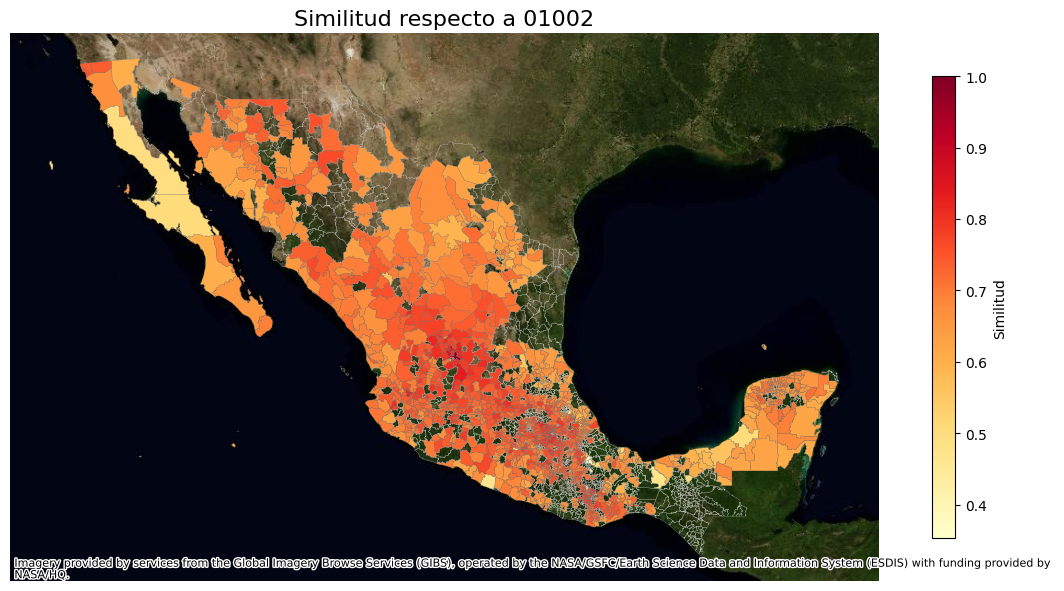

In [38]:
selected_cvegeo = "01002"
plot_similarity_with_basemap(selected_cvegeo, df_division, df_similarity, colorbar_shrink=0.5)